# Countries of the world Data Analysis

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as missin

In [34]:
data = pd.read_csv('../input/countries-of-the-world/countries of the world.csv')
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

After loading the data we can see that some values are missing, we will have to convert the format numbers 0.00 to 0.00, and correct the data types.

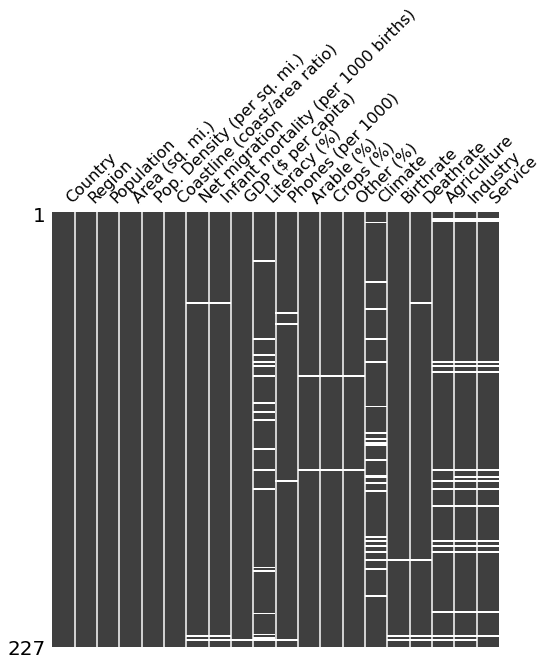

In [37]:
fig,ax = plt.subplots(figsize=(8,8))
missin.matrix(data,ax=ax,sparkline=False)
plt.show()

I am using the missingno library to better understand the relationship of missing values. It appears that most of the missing data comes from the same few countries, especially in the Agriculture, Industry and Service columns.

I decided to fill in the missing values ​​with the means of each column.

In [38]:
data.fillna(data.mean(), inplace=True)

In [39]:
def value_converter(cols):
    for c in cols:
        data[c] = data[c].astype(str)
        new_data = []
        for val in data[c]:
            val = val.replace(',','.')
            val = float(val)
            new_data.append(val)

        data[c] = new_data

cols = data[['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']]

value_converter(cols)

I created a value converter function which helps me replace the commas with dots, and change the data types to float. After running the function let's check our data again.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

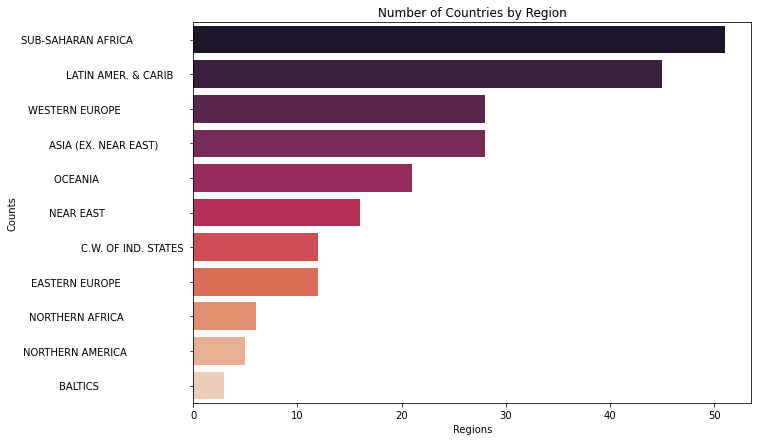

In [41]:
region = data['Region'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(y=region.index, x=region.values, palette='rocket')
plt.title('Number of Countries by Region')
plt.xlabel('Regions')
plt.ylabel('Counts')
plt.show()

First I wanted to know the number of countries in each region. It looks like the Sub-Saharan and the Latin America/Caribbean region contains the most nations.

The next viz shows the shows each region based on their GDP.

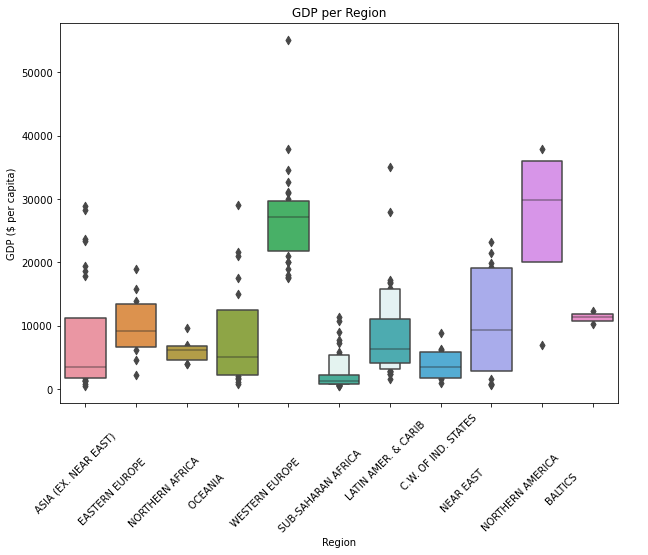

In [42]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=data, x='Region', y='GDP ($ per capita)')
plt.title('GDP per Region')
plt.xticks(rotation=45)
plt.show()

As expected, Northern America and Western Europe have the highest median, but there are some outliers in the Latin America & Caribbean region also.

In [45]:
data[data['Region'] == 'LATIN AMER. & CARIB'].nlargest(1, 'GDP ($ per capita)')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


I want to analyze further the relation between GDP and some of the fields with the strongest correlation (positive and negative) with GDP.

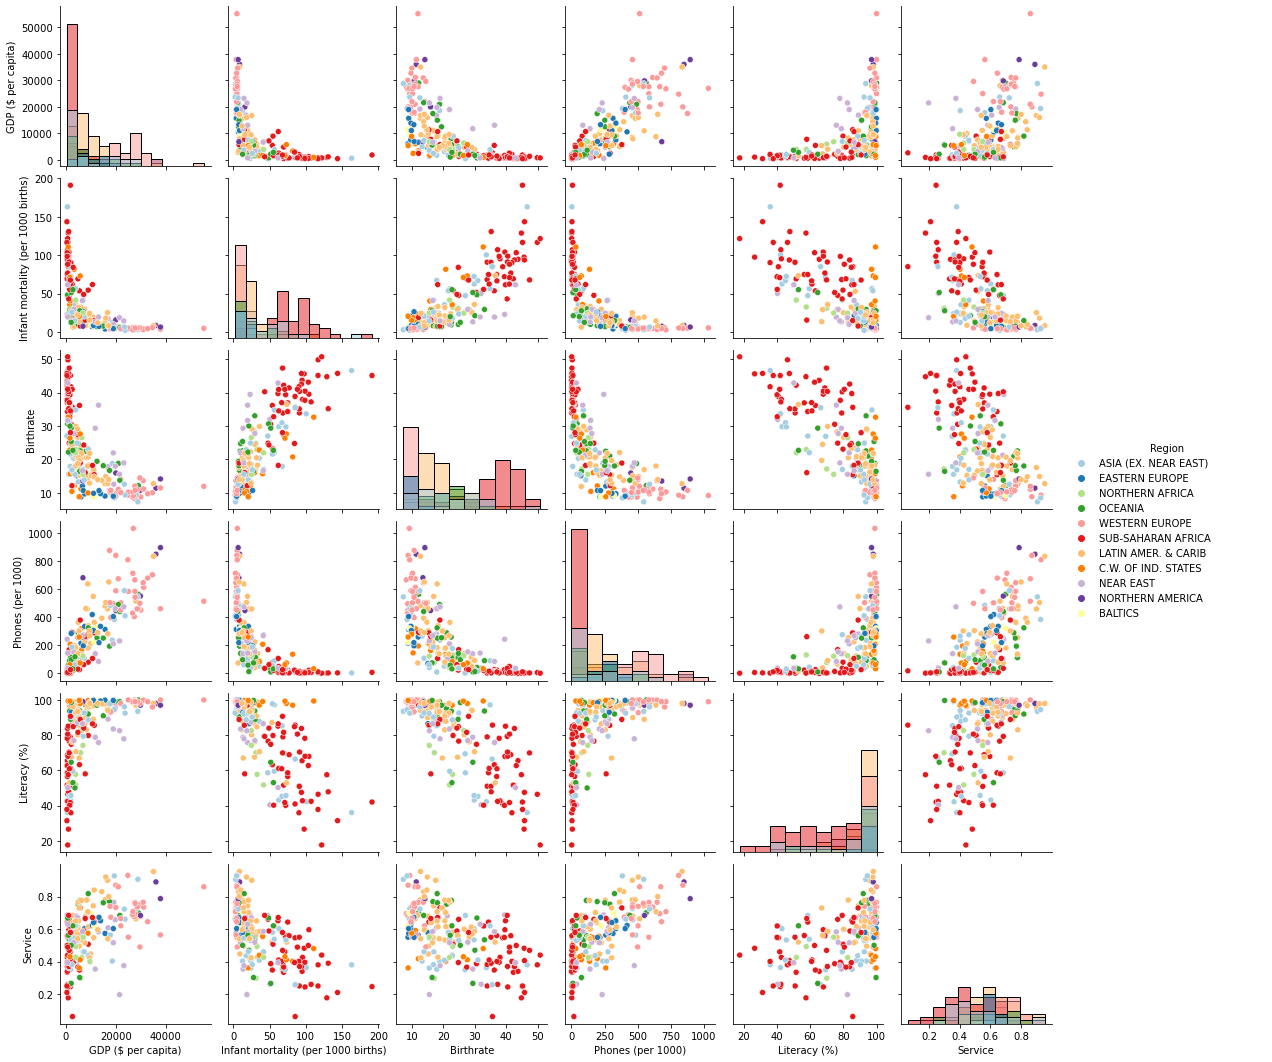

In [44]:
x = data.loc[:,["Region","GDP ($ per capita)","Infant mortality (per 1000 births)","Birthrate","Phones (per 1000)","Literacy (%)","Service"]]
sns.pairplot(x, hue="Region",palette='Paired', diag_kind='hist')
plt.show()

I also wanted to analyze the way how different sectors are distributed in each region, and which are the top countries in each of the 3 sectors (Agriculture, Service, Industry)

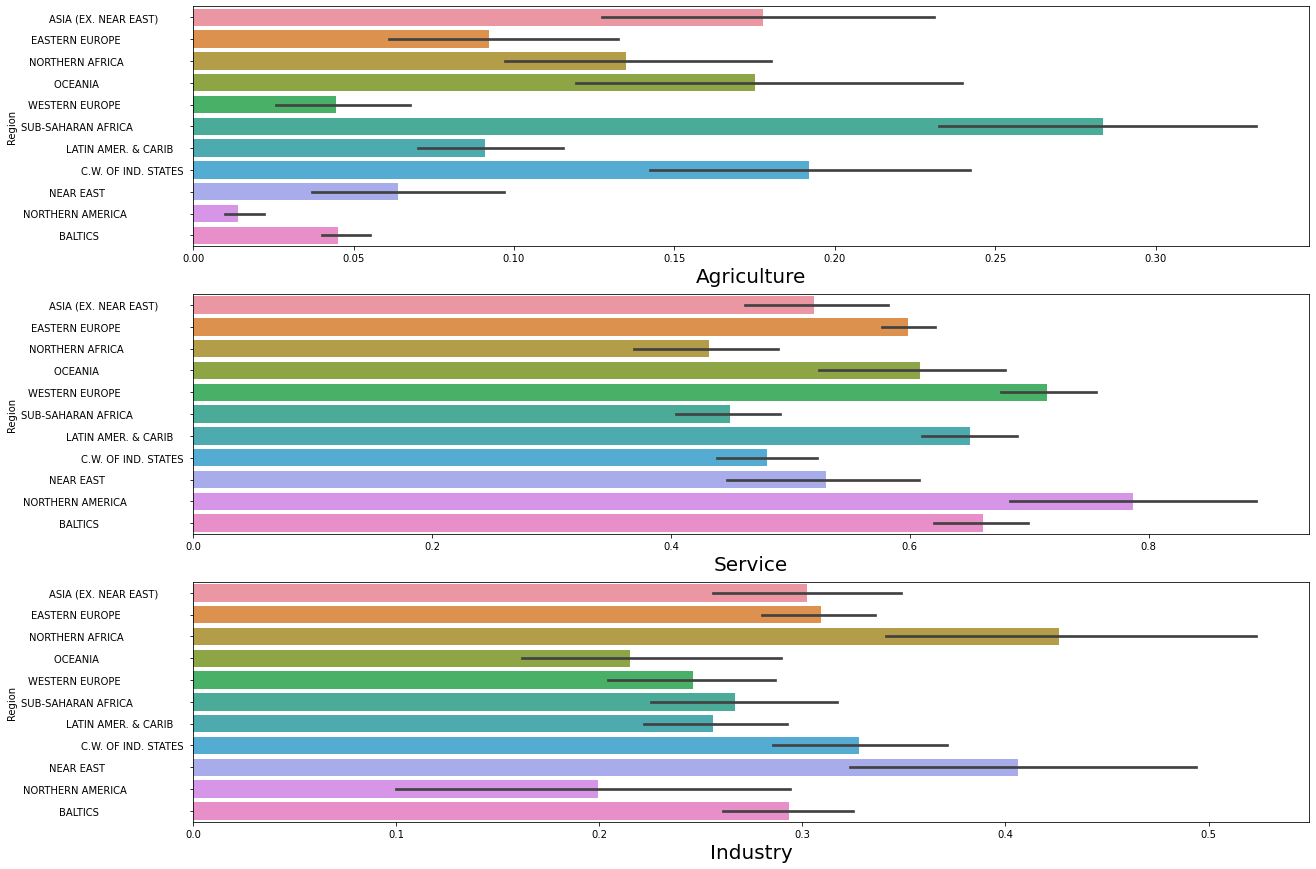

In [46]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.barplot(data=data, x='Agriculture', y='Region', ax=ax1)
sns.barplot(data=data, x='Service', y='Region', ax=ax2)
sns.barplot(data=data, x='Industry', y='Region', ax=ax3)

ax1.set_xlabel('Agriculture', fontsize=20)
ax2.set_xlabel('Service', fontsize=20)
ax3.set_xlabel('Industry', fontsize=20)

plt.show()

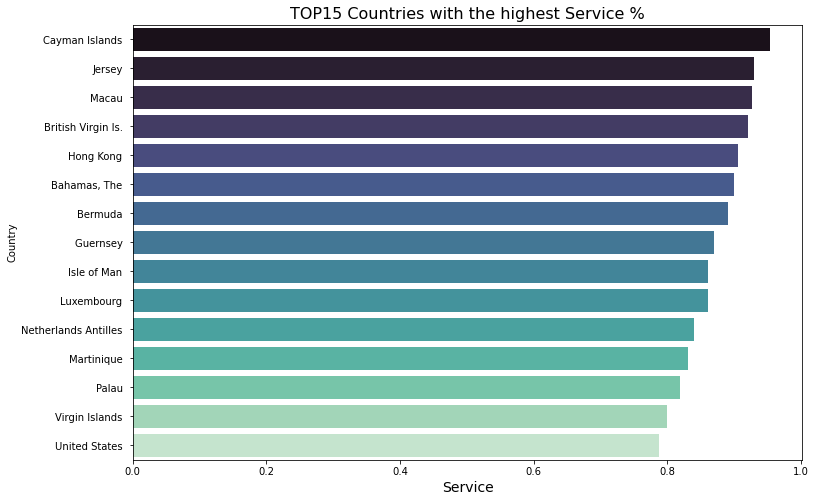

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(data = data.nlargest(15, 'Service'), y = 'Country', x = 'Service', palette='mako')
plt.title("TOP15 Countries with the highest Service %", size=16)
plt.xlabel(xlabel='Service', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data = data.nlargest(15, 'Agriculture'), y = 'Country', x = 'Agriculture', palette='magma')
plt.title("TOP15 Countries with the highest Agriculture %", size=16)
plt.xlabel(xlabel='Agriculture', fontsize=14)
plt.show()